# Examine small lossy compression systems

## Problem statement
Given:
- an input vector $y\in\mathbb{GF}(q)^n$
- an $n-k$-by-$n$ "parity-check" matrix $H$ also taking values in $\mathbb{GF}(q)$
find the vector $x\in\mathbb{GF}(q)^n$ minimizing the energy function

$$E(x) = \beta_1 N_{unsat checks}(x) + \beta_2 d_H(x,y) $$  
where 
- $N_{unsat checks}(x) = \sum_{f=1}^{n-k} \mathbb{I}[H_{fv}x_v\neq0]$ 
- d_H is the Hamming distance

In the limit $\beta_1 \gg \beta_2$ the check constraints become infinitely rigid and we recover the compression problem.

In the following, we refer as _solutions_ to those configurations $x$ that satisfy all the constraints.

## Code

### Build an instance of the problem

Include dependencies

In [25]:
include("../code/headers.jl")

mpldefault (generic function with 1 method)

Initialize a variable of the pre-defined type `LossyModel` 

In [2]:
q = 2     # work on 𝔾𝔽(q=2)
n = 20    # number of variables ⟷ length of the vector to be compressed 
k = 2     # length of compressed vector
m = n-k   # number of constraints ⟷ parity checks in the factor graph 
lm = LossyModel(q,n,m)

Lossy compression model:
 - Factor Graph with n=20 variables and m=18 factors defined on GF(2)
 - Inverse temperatures β₁=Inf for checks and β₂=1.0 for overlap


Such object contains:
- A randomly constructed factor graph (⟷ parity check matrix) `lm.fg` with the requested number of variables (`n`) and factors (`m`)
- A randomly extracted source vector `lm.y` of length `n`
- Two temperatures for constraints `lm.beta1` and overlap `lm.beta2` which left as variables for e.g. Monte Carlo simulations
- A guess `lm.x` of lenth `n` for the solution of the compression problem, which gets updated when solvers iterate over the object

Show the adjacency matrix

In [3]:
H = adjmat(lm)

18×20 Array{Int64,2}:
 0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1
 1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0
 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0
 0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0
 0  0  0  0  1  0 

Show the vector to be compressed

In [4]:
y = lm.y

20-element Array{Int64,1}:
 1
 0
 0
 0
 1
 1
 1
 1
 0
 0
 0
 1
 0
 0
 0
 0
 1
 0
 0
 1

### Take a closer look at the space of solutions

One can ask i.e. for the rank of the homogeneous system defined by matrix H

In [5]:
rank(lm)

18

Or build a basis for the kernel

In [6]:
nullspace(lm)

20×2 Array{Int64,2}:
 1  0
 1  1
 1  1
 1  0
 1  0
 1  0
 0  0
 1  1
 1  1
 1  0
 1  0
 1  1
 0  0
 1  0
 0  0
 1  0
 1  1
 0  1
 1  0
 1  1

From here it is easy to produce a list of all the solutions (linear combinations of the basis vectors

In [7]:
sols = enum_solutions(lm)

4-element Array{Array{Int64,1},1}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]
 [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]

Re-organize them as a matrix

In [8]:
solutions_as_matrix = hcat(sols...)

20×4 Array{Int64,2}:
 0  1  0  1
 0  1  1  0
 0  1  1  0
 0  1  0  1
 0  1  0  1
 0  1  0  1
 0  0  0  0
 0  1  1  0
 0  1  1  0
 0  1  0  1
 0  1  0  1
 0  1  1  0
 0  0  0  0
 0  1  0  1
 0  0  0  0
 0  1  0  1
 0  1  1  0
 0  0  1  1
 0  1  0  1
 0  1  1  0

Check that they indeed satisfy all the constraints

In [9]:
gfmatrixmult(H,solutions_as_matrix,q)

18×4 Array{Int64,2}:
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0
 0  0  0  0

They do!

Plot the pairwise distances between solutions

In [10]:
solutions_distances(lm)

4×4 Array{Int64,2}:
  0  16   8  10
 16   0  10   8
  8  10   0  16
 10   8  16   0

Select only those at distance less than 10

In [11]:
solutions_distances(lm, cutoff=10)

4×4 Array{Int64,2}:
 0  0  8  0
 0  0  0  8
 8  0  0  0
 0  8  0  0

Plot a graph from this adjacency matrix

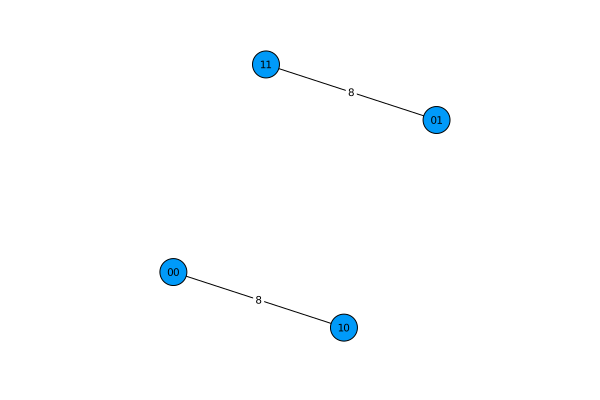

In [26]:
plot_solutions_graph(lm, cutoff=10)

There are 2 connected components. Let's check

In [13]:
connected_components(lm, cutoff=10)

2-element Array{Array{Int64,1},1}:
 [1, 3]
 [2, 4]

The weight enumeration function

In [16]:
wef(lm)

20-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 1
 0
 1
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0